- colab

In [1]:
# !wget https://s3.amazonaws.com/keras-datasets/jena_climate_2009_2016.csv.zip
# !unzip jena_climate_2009_2016.csv.zip

# import os
# fname = os.path.join('jena_climate_2009_2016.csv')

- macOS or Windows

In [2]:
import os
data_dir = './datasets/jena_climate/'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv')

In [3]:
f = open(fname)
data = f.read()
f.close()

lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

print(f"header: \n{header}\n")
print(f"line length: {len(lines)}")

header: 
['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']

line length: 420451


In [4]:
import numpy as np
temperature = np.zeros((len(lines),))
raw_data = np.zeros((len(lines), len(header) - 1))
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(",")[1:]]
    temperature[i] = values[1]
    raw_data[i, :] = values[:]

In [5]:
# from matplotlib import pyplot as plt
# plt.plot(range(len(temperature)), temperature)
# plt.show()

In [6]:
# plt.plot(range(1440), temperature[:1440])
# plt.show()

In [7]:
num_train_samples = int(0.5 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples

print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)

num_train_samples: 210225
num_val_samples: 105112
num_test_samples: 105114


In [8]:
mean = raw_data[:num_train_samples].mean(axis=0)
raw_data -= mean
std = raw_data[:num_train_samples].std(axis=0)
raw_data /= std

In [9]:
import numpy as np
from tensorflow import keras

In [10]:
# DONE timeseries_dataset_from_array
# https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array#returns

int_sequence = np.arange(10)
dummy_dataset = keras.utils.timeseries_dataset_from_array(
    data=int_sequence[:-3],
    targets=int_sequence[3:],
    sequence_length=3,
    batch_size=2,
)

for inputs, targets in dummy_dataset:
    for i in range(inputs.shape[0]):
        print([int(x) for x in inputs[i]], int(targets[i]))

[0, 1, 2] 3
[1, 2, 3] 4
[2, 3, 4] 5
[3, 4, 5] 6
[4, 5, 6] 7


In [11]:
int_sequence = np.arange(20)
dummy_dataset = keras.utils.timeseries_dataset_from_array(
    data=int_sequence[:-3],
    targets=int_sequence[3:],
    sampling_rate=2,
    sequence_length=3,
    batch_size=2,
)

for inputs, targets in dummy_dataset:
    for i in range(inputs.shape[0]):
        print([int(x) for x in inputs[i]], int(targets[i]))

[0, 2, 4] 3
[1, 3, 5] 4
[2, 4, 6] 5
[3, 5, 7] 6
[4, 6, 8] 7
[5, 7, 9] 8
[6, 8, 10] 9
[7, 9, 11] 10
[8, 10, 12] 11
[9, 11, 13] 12
[10, 12, 14] 13
[11, 13, 15] 14


In [12]:
int_sequence = np.arange(10)
dummy_dataset = keras.utils.timeseries_dataset_from_array(
    data=int_sequence[:-3],
    targets=int_sequence[3:],
    sequence_length=3,
    batch_size=2,
    shuffle=True,
)

for inputs, targets in dummy_dataset:
    for i in range(inputs.shape[0]):
        print([int(x) for x in inputs[i]], int(targets[i]))

[4, 5, 6] 7
[0, 1, 2] 3
[2, 3, 4] 5
[3, 4, 5] 6
[1, 2, 3] 4


In [13]:
int_sequence = np.arange(10)
dummy_dataset = keras.utils.timeseries_dataset_from_array(
    data=int_sequence[:-3],
    targets=int_sequence[3:],
    sequence_length=3,
    batch_size=2,
    shuffle=True,
    seed=42,
)

for inputs, targets in dummy_dataset:
    for i in range(inputs.shape[0]):
        print([int(x) for x in inputs[i]], int(targets[i]))

[1, 2, 3] 4
[3, 4, 5] 6
[4, 5, 6] 7
[0, 1, 2] 3
[2, 3, 4] 5


In [14]:
# DONE smpling_rate delay
sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256

sampling_rate = 3
sequence_length = 6
delay = sampling_rate * (sequence_length + 6 - 1)
batch_size = 2

train_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples)

for inputs, targets in train_dataset:
    for i in range(10):
        print(f"{[x for x in inputs[i]]}\n")
        print(f"target: {targets[i]}\n")
        break
    break

[<tf.Tensor: shape=(14,), dtype=float64, numpy=
array([-2.10100722, -0.97661832, -0.80818761, -0.9326573 ,  0.42259538,
       -0.90980537, -0.97280982, -0.60623022, -0.94976191, -0.94818683,
        0.38173732,  0.70437781,  2.39749711,  0.92672312])>, <tf.Tensor: shape=(14,), dtype=float64, numpy=
array([-2.01635222, -0.99828066, -0.83638648, -0.91853323,  0.53084145,
       -0.92164546, -0.96316405, -0.63138951, -0.94216536, -0.94104345,
        0.42407867,  1.16082373,  2.01868573,  0.96399729])>, <tf.Tensor: shape=(14,), dtype=float64, numpy=
array([-1.95403673, -1.03248435, -0.87473693, -0.88746027,  0.72929258,
       -0.9387478 , -0.94146108, -0.67751488, -0.9193757 , -0.91961329,
        0.47093962,  0.52179944,  0.89086093,  0.74384669])>, <tf.Tensor: shape=(14,), dtype=float64, numpy=
array([-1.88113936, -1.06554791, -0.91308739, -0.86344936,  0.9097027 ,
       -0.95585015, -0.92699243, -0.71735042, -0.90418259, -0.90532651,
        0.51994141,  1.08909652,  1.75179589,  1.

In [15]:
print("num_train_samples:", num_train_samples)
print("num_val_samples:", num_val_samples)
print("num_test_samples:", num_test_samples)

num_train_samples: 210225
num_val_samples: 105112
num_test_samples: 105114


In [16]:
sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256

train_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=0,
    end_index=num_train_samples)

val_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples,
    end_index=num_train_samples + num_val_samples)

test_dataset = keras.utils.timeseries_dataset_from_array(
    raw_data[:-delay],
    targets=temperature[delay:],
    sampling_rate=sampling_rate,
    sequence_length=sequence_length,
    shuffle=True,
    batch_size=batch_size,
    start_index=num_train_samples + num_val_samples)

In [17]:
for samples, targets in train_dataset:
    print("sample shape:", samples.shape)
    print("target shape:", targets.shape)
    break

sample shape: (256, 120, 14)
target shape: (256,)


- 상식 수준의 기준점

In [18]:
def evaluate_naive_method(dataset):
    total_abs_err = 0.
    samples_seen = 0
    for samples, targets in dataset:
        preds = samples[:, -1, 1] * std[1] + mean[1]
        total_abs_err += np.sum(np.abs(preds - targets))
        samples_seen += samples.shape[0]
    return total_abs_err / samples_seen

print(f"검증 MAE: {evaluate_naive_method(val_dataset):.2f}")
print(f"테스트 MAE: {evaluate_naive_method(test_dataset):.2f}")

검증 MAE: 2.44
테스트 MAE: 2.62


In [19]:
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

- 기본적인 머신 러닝 모델 시도 해보기

In [20]:
# inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
# x = layers.Flatten()(inputs)
# x = layers.Dense(16, activation="relu")(x)
# outputs = layers.Dense(1)(x)
# model = keras.Model(inputs, outputs)

# callbacks = [
#     keras.callbacks.ModelCheckpoint("jena_dense.keras",
#                                     save_best_only=True)
# ]
# model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
# history = model.fit(train_dataset,
#                     epochs=10,
#                     validation_data=val_dataset,
#                     callbacks=callbacks)

# model = keras.models.load_model("jena_dense.keras")
# print(f"테스트 MAE: {model.evaluate(test_dataset)[1]:.2f}")

In [21]:
# loss = history.history["mae"]
# val_loss = history.history["val_mae"]
# epochs = range(1, len(loss) + 1)
# plt.figure()
# plt.plot(epochs, loss, "bo", label="Training MAE")
# plt.plot(epochs, val_loss, "b", label="Validation MAE")
# plt.title("Training and validation MAE")
# plt.legend()
# plt.show()

In [22]:
# inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
# x = layers.Conv1D(8, 24, activation="relu")(inputs)
# x = layers.MaxPooling1D(2)(x)
# x = layers.Conv1D(8, 12, activation="relu")(x)
# x = layers.MaxPooling1D(2)(x)
# x = layers.Conv1D(8, 6, activation="relu")(x)
# x = layers.GlobalAveragePooling1D()(x)
# outputs = layers.Dense(1)(x)
# model = keras.Model(inputs, outputs)

# callbacks = [
#     keras.callbacks.ModelCheckpoint("jena_conv.keras",
#                                     save_best_only=True)
# ]
# model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
# history = model.fit(train_dataset,
#                     epochs=10,
#                     validation_data=val_dataset,
#                     callbacks=callbacks)

# model = keras.models.load_model("jena_conv.keras")
# print(f"테스트 MAE: {model.evaluate(test_dataset)[1]:.2f}")

In [23]:
# loss = history.history["mae"]
# val_loss = history.history["val_mae"]
# epochs = range(1, len(loss) + 1)
# plt.figure()
# plt.plot(epochs, loss, "bo", label="Training MAE")
# plt.plot(epochs, val_loss, "b", label="Validation MAE")
# plt.title("Training and validation MAE")
# plt.legend()
# plt.show()

- LSTM

In [24]:
print(f"shape: {(sequence_length, raw_data.shape[-1])}")

shape: (120, 14)


In [25]:
# DONE shape & keras.Input
# DONE load_model

inputs = keras.Input(shape=(sequence_length, raw_data.shape[-1]))
x = layers.LSTM(16)(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

callbacks = [
    keras.callbacks.ModelCheckpoint("jena_lstm_221117.keras",
                                    save_best_only=True)
]

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    callbacks=callbacks)

Epoch 1/10
819/819 [==============================] - 34s 41ms/step - loss: 38.8555 - mae: 4.5481 - val_loss: 12.3289 - val_mae: 2.6905
Epoch 2/10
819/819 [==============================] - 33s 40ms/step - loss: 11.1045 - mae: 2.5888 - val_loss: 10.1867 - val_mae: 2.4868
Epoch 3/10
819/819 [==============================] - 34s 41ms/step - loss: 10.0144 - mae: 2.4644 - val_loss: 9.6878 - val_mae: 2.4127
Epoch 4/10
819/819 [==============================] - 33s 40ms/step - loss: 9.5463 - mae: 2.4008 - val_loss: 9.8411 - val_mae: 2.4347
Epoch 5/10
819/819 [==============================] - 33s 40ms/step - loss: 9.1096 - mae: 2.3428 - val_loss: 9.7390 - val_mae: 2.4164
Epoch 6/10
819/819 [==============================] - 33s 40ms/step - loss: 8.8067 - mae: 2.3057 - val_loss: 10.0108 - val_mae: 2.4472
Epoch 7/10
819/819 [==============================] - 33s 41ms/step - loss: 8.5748 - mae: 2.2768 - val_loss: 10.0699 - val_mae: 2.4591
Epoch 8/10
819/819 [==============================] - 3

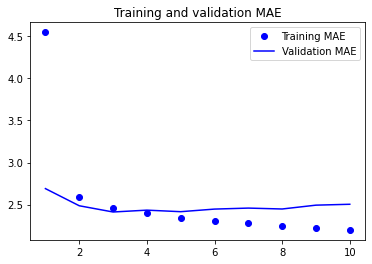

In [26]:
loss = history.history["mae"]
val_loss = history.history["val_mae"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training MAE")
plt.plot(epochs, val_loss, "b", label="Validation MAE")
plt.title("Training and validation MAE")
plt.legend()
plt.show()

In [27]:
model = keras.models.load_model("jena_lstm_221117.keras")
print(f"테스트 MAE: {model.evaluate(test_dataset)[1]:.2f}")

405/405 [==============================] - 6s 15ms/step - loss: 10.4653 - mae: 2.5391
테스트 MAE: 2.54


- Prediction

In [28]:
pred_train = model.predict(train_dataset)
pred_val = model.predict(val_dataset)
pred_test = model.predict(test_dataset)

print(f"train shape: {pred_train.shape}")
print(f"val shape: {pred_val.shape}")
print(f"test shape: {pred_test.shape}")

train shape: (209506, 1)
val shape: (104393, 1)
test shape: (103537, 1)


In [29]:
x_label = np.arange(pred_train.shape[0] + pred_val.shape[0] + pred_test.shape[0])
# x_label = x_label.reshape(len(x_label), 1)
print(f"x_label shape: {x_label.shape}")

x_label shape: (417436,)


In [30]:
train_start = 0
train_end = train_start + pred_train.shape[0]
x_train = x_label[train_start:train_end]
y_train = temperature[(delay + train_start):(delay + train_end)]

val_start = train_end
val_end = val_start + pred_val.shape[0]
x_val = x_label[val_start:val_end]
y_val = temperature[(delay + val_start):(delay + val_end)]

test_start = val_end
test_end = test_start + pred_test.shape[0]
x_test = x_label[test_start:test_end]
y_test = temperature[(delay + test_start):(delay + test_end)]

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

print(f"x_val shape: {x_val.shape}")
print(f"y_val shape: {y_val.shape}")

print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")


x_train shape: (209506,)
y_train shape: (209506,)
x_val shape: (104393,)
y_val shape: (104393,)
x_test shape: (103537,)
y_test shape: (103537,)


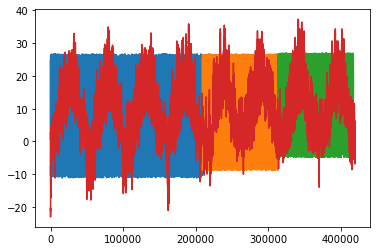

In [31]:
plt.figure()
plt.plot(x_train, pred_train)
plt.plot(x_val, pred_val)
plt.plot(x_test, pred_test)
plt.plot(temperature[delay:])
plt.show()

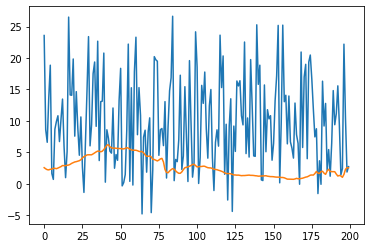

In [32]:
plt.figure()
plt.plot(pred_test[:200])
plt.plot(y_test[:200])
plt.show()